## Setup

In [5]:
import keras
print(keras.__version__)


2.15.0


In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Load Dataset

In [7]:


# Load the CSV file into a pandas DataFrame
df = pd.read_csv('data.csv')

# Now you can work with the data, for example, print the first few rows
print(df.head())
print(type(df))

   count    channel_1   channel_2   channel_3   channel_4  acc_x  acc_y  \
0  101.0 -1009.670141 -393.942362 -930.014012 -308.921346    0.0    0.0   
1  101.0  -999.179721 -378.260961 -911.722161 -313.925332    0.0    0.0   
2  102.0  -985.618844 -377.640138 -923.992773 -321.749203    0.0    0.0   
3  102.0  -997.747340 -395.423362 -938.873835 -323.286302    0.0    0.0   
4  103.0  -999.497613 -407.675274 -941.001838 -320.163485    0.0    0.0   

   acc_z  resistance_1  resistance_2  resistance_3  resistance_4  \
0    0.0           0.0           0.0           0.0           0.0   
1    0.0           0.0           0.0           0.0           0.0   
2    0.0           0.0           0.0           0.0           0.0   
3    0.0           0.0           0.0           0.0           0.0   
4    0.0           0.0           0.0           0.0           0.0   

   resistance_5     timestamp  marker       class  
0           0.0  1.704024e+09     0.0  eyes_blink  
1           0.0  1.704024e+09     0.

### remove unwanted columns

In [8]:
# df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Specify the columns you want to remove
columns_to_remove = ['count', 'acc_x','acc_y', 'acc_z', 'resistance_1', 'resistance_2', 'resistance_3', 'resistance_4', 'resistance_5', 'timestamp', 'marker']

# Removing specified columns
df = df.drop(columns_to_remove, axis=1)

print("\nDataFrame after removing specified columns:")
print(df)

Original DataFrame:
        count    channel_1   channel_2   channel_3   channel_4  acc_x  acc_y  \
0       101.0 -1009.670141 -393.942362 -930.014012 -308.921346    0.0    0.0   
1       101.0  -999.179721 -378.260961 -911.722161 -313.925332    0.0    0.0   
2       102.0  -985.618844 -377.640138 -923.992773 -321.749203    0.0    0.0   
3       102.0  -997.747340 -395.423362 -938.873835 -323.286302    0.0    0.0   
4       103.0  -999.497613 -407.675274 -941.001838 -320.163485    0.0    0.0   
...       ...          ...         ...         ...         ...    ...    ...   
427046  163.0  -698.319730   92.964563   -5.252689  -57.966579    0.0    0.0   
427047  164.0  -735.782307   -2.036376  -62.196406 -125.920562    0.0    0.0   
427048  164.0  -759.089364  -58.763178  -92.340000 -159.751697    0.0    0.0   
427049  165.0  -717.879406   36.473374  -33.522593  -90.739323    0.0    0.0   
427050  165.0  -699.123808   93.458230   -7.044102  -55.195313    0.0    0.0   

        acc_z  resi

## EDA

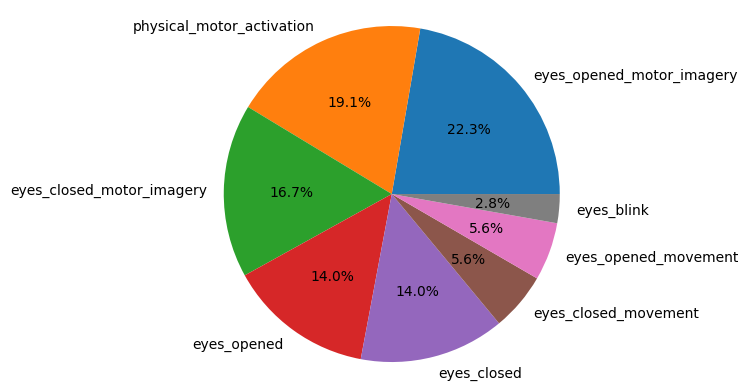

In [9]:
# Assuming you have a dataframe named df with a column named 'Class'
# Count the number of classes
class_counts = df['class'].value_counts()

# Create pie chart
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### get only required classes

In [10]:

# import pandas as pd

# Assuming you have a dataframe `df` and you want to drop rows where `class` column has value `specific_value`

df = df[df['class'] != 'eyes_blink']
df = df[df['class'] != 'eyes_opened_movement']
df = df[df['class'] != 'eyes_closed_movement']
# df = df[df['class'] != 'eyes_closed']
df = df[df['class'] != 'eyes_closed_motor_imagery']
df = df[df['class'] != 'physical_motor_activation']
print(df.head)


<bound method NDFrame.head of          channel_1   channel_2   channel_3   channel_4  \
11894  -634.363700  216.115729 -485.345517   50.299784   
11895  -629.980538  203.171935 -493.947287   60.255398   
11896  -607.234466  215.906294 -482.196521   70.368088   
11897  -627.074635  231.591435 -475.846171   57.442993   
11898  -635.885840  208.879022 -495.267471   46.410289   
...            ...         ...         ...         ...   
321821 -481.321384  287.740423  114.003370  146.882701   
321822 -539.431950  161.832951   28.823409   46.324271   
321823 -527.266055  197.833228   61.652251   82.979030   
321824 -455.856406  332.899715  154.599984  194.682362   
321825 -489.272412  287.639445  115.820962  154.138107   

                            class  
11894                 eyes_closed  
11895                 eyes_closed  
11896                 eyes_closed  
11897                 eyes_closed  
11898                 eyes_closed  
...                           ...  
321821  eyes_opened_m

In [11]:
df.loc[df['class'] == 'eyes_opened', 'class'] = 'eyes_static'
df.loc[df['class'] == 'eyes_closed', 'class'] = 'eyes_static'

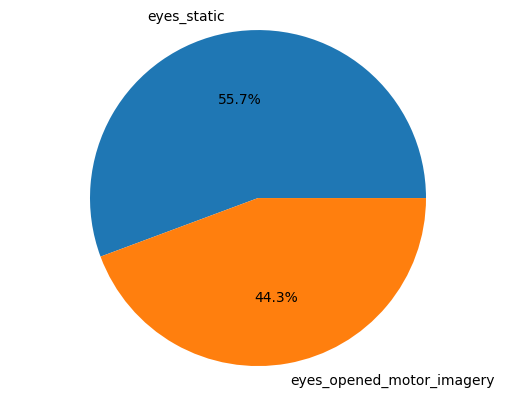

In [12]:
class_counts = df['class'].value_counts()

# Create pie chart
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [13]:
df.shape

(214643, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214643 entries, 11894 to 321825
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   channel_1  214643 non-null  float64
 1   channel_2  214643 non-null  float64
 2   channel_3  214643 non-null  float64
 3   channel_4  214643 non-null  float64
 4   class      214643 non-null  object 
dtypes: float64(4), object(1)
memory usage: 9.8+ MB


In [15]:
df.isnull().sum()

channel_1    0
channel_2    0
channel_3    0
channel_4    0
class        0
dtype: int64

In [16]:
df['class'].value_counts()

class
eyes_static                  119486
eyes_opened_motor_imagery     95157
Name: count, dtype: int64

In [17]:
eyes_static = df[df['class']=='eyes_static'].head(95157).copy()
eyes_opened_motor_imagery = df[df['class']=='eyes_opened_motor_imagery'].head(95157).copy()

In [18]:
balanced_data = pd.DataFrame()
balanced_data = pd.concat([balanced_data, eyes_opened_motor_imagery, eyes_static], ignore_index=True)
balanced_data.shape

(190314, 5)

In [20]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['class'])
balanced_data.tail()

,channel_1,channel_2,channel_3,channel_4,class,label
190309,-801.956097,17.487772,-578.280161,-12.156545,eyes_static,1
190310,-792.299676,30.334329,-569.955143,-17.283948,eyes_static,1
190311,-795.444931,11.242139,-594.997514,-34.756760,eyes_static,1
190312,-779.210026,-3.968034,-609.590603,-10.802701,eyes_static,1
190313,-810.696243,15.225133,-580.389464,-12.844686,eyes_static,1


In [21]:
X = balanced_data[['channel_1', 'channel_2', 'channel_3', 'channel_4']]
y = balanced_data['label']

### Standardized data

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['channel_1', 'channel_2', 'channel_3', 'channel_4'])
scaled_X['label'] = y.values

scaled_X

,channel_1,channel_2,channel_3,channel_4,label
0,-1.395937,-1.560658,-1.275400,-1.533250,0
1,-1.363410,-1.537233,-1.270710,-1.526287,0
2,-1.391257,-1.562424,-1.298505,-1.549968,0
3,-1.308581,-1.556416,-1.297388,-1.507035,0
4,-1.326819,-1.556145,-1.275812,-1.487703,0
...,...,...,...,...,...
190309,-0.401017,0.136461,-0.116146,0.239723,1
190310,-0.358014,0.172352,-0.097437,0.221149,1
190311,-0.372021,0.119012,-0.153716,0.157855,1
190312,-0.299721,0.076517,-0.186512,0.244627,1


### Frame preparation


In [23]:
import scipy.stats as stats

In [24]:
Fs = 200
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [25]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 4

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        channel_1 = df['channel_1'].values[i: i + frame_size]
        channel_2 = df['channel_2'].values[i: i + frame_size]
        channel_3 = df['channel_3'].values[i: i + frame_size]
        channel_4 = df['channel_4'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0]
        # print(label)
        frames.append([channel_1, channel_2, channel_3, channel_4])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [26]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [27]:
X.shape, y.shape

((474, 800, 4), (474,))

### Train test split

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27, stratify = y)

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 800, 4), (95, 800, 4), (379,), (95,))

In [30]:
num_classes = len(np.unique(y_train))
print(num_classes)

2


In [31]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [32]:
x_train.shape

(379, 800, 4)

In [33]:
print(keras.__version__)

2.15.0


## Build a model

We build a Fully Convolutional Neural Network originally proposed in
[this paper](https://arxiv.org/abs/1611.06455).
The implementation is based on the TF 2 version provided
[here](https://github.com/hfawaz/dl-4-tsc/).
The following hyperparameters (kernel_size, filters, the usage of BatchNorm) were found
via random search using [KerasTuner](https://github.com/keras-team/keras-tuner).

In [64]:

def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)
    mlp_vector = keras.layers.Dropout(0.2)(gap)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(mlp_vector)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Train the model

In [81]:
epochs = 50
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/2
10/10 [==============================] - 3s 132ms/step - loss: 0.0012 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.3621e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 0.0010
Epoch 2/2
10/10 [==============================] - 1s 106ms/step - loss: 4.9644e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 4.9993e-05 - val_sparse_categorical_accuracy: 1.0000 - lr: 0.0010


## Evaluate model on test data

In [82]:
model = keras.models.load_model("best_model.keras")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

3/3 [==============================] - 0s 16ms/step - loss: 1.3799e-05 - sparse_categorical_accuracy: 1.0000
Test accuracy 1.0
Test loss 1.379913737764582e-05


## Plot the model's training and validation loss

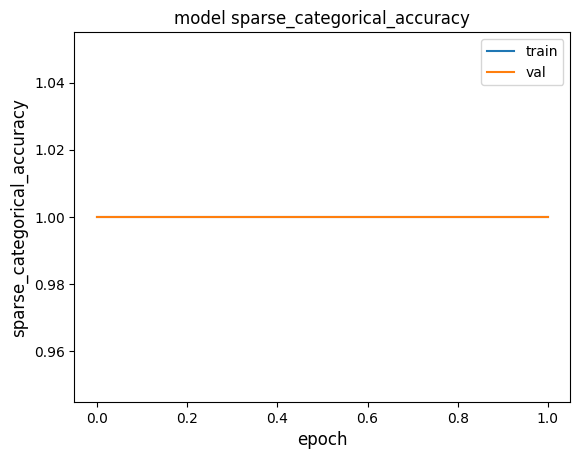

In [83]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

We can see how the training accuracy reaches almost 0.95 after 100 epochs.
However, by observing the validation accuracy we can see how the network still needs
training until it reaches almost 0.97 for both the validation and the training accuracy
after 200 epochs. Beyond the 200th epoch, if we continue on training, the validation
accuracy will start decreasing while the training accuracy will continue on increasing:
the model starts overfitting.

### create ypred

In [68]:
# prompt: how to predict time series data with keras model

ypred = model.predict(x_test)


3/3 [==============================] - 0s 17ms/step


In [69]:
ypred

array([[3.23589156e-05, 9.99967694e-01],
       [9.99913216e-01, 8.67516719e-05],
       [9.99972582e-01, 2.74476533e-05],
       [3.37028141e-05, 9.99966264e-01],
       [9.99917030e-01, 8.29706914e-05],
       [9.99986887e-01, 1.31065926e-05],
       [9.99958754e-01, 4.12908084e-05],
       [3.78330733e-05, 9.99962211e-01],
       [9.99908328e-01, 9.16117788e-05],
       [8.97576319e-06, 9.99991059e-01],
       [9.99805391e-01, 1.94665903e-04],
       [3.62369392e-05, 9.99963760e-01],
       [9.99986887e-01, 1.30729877e-05],
       [1.65788824e-05, 9.99983430e-01],
       [3.30140138e-05, 9.99966979e-01],
       [6.08062073e-05, 9.99939203e-01],
       [5.28837481e-05, 9.99947071e-01],
       [3.62073006e-05, 9.99963760e-01],
       [3.59410296e-05, 9.99963999e-01],
       [9.99917865e-01, 8.20883943e-05],
       [9.99960065e-01, 3.99730598e-05],
       [9.99977946e-01, 2.20632173e-05],
       [2.56985822e-05, 9.99974251e-01],
       [9.99968171e-01, 3.17796294e-05],
       [9.999688

### post processing for ypred

In [70]:
# np.set_printoptions(linewidth=200)

In [71]:
def convert_to_single_dimension(predictions):
    # Get the index of the maximum probability for each prediction
    max_indices = np.argmax(predictions, axis=1)

    return max_indices

In [72]:
# ypred

In [73]:
converted_predictions = convert_to_single_dimension(ypred)
print(converted_predictions)

[1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1]


In [74]:
np.count_nonzero(converted_predictions == 1)

48

In [75]:
# y_test

In [76]:
np.count_nonzero(y_test == 1)

48

### Confusion matrix

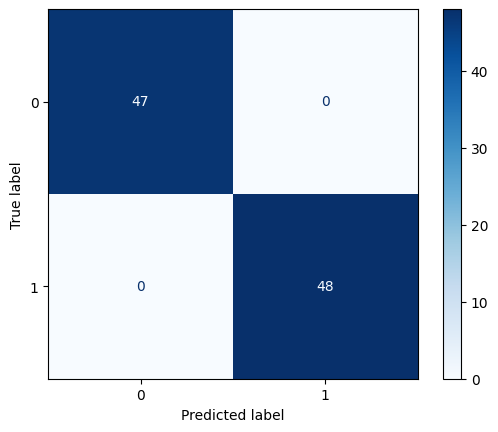

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["0","1"]

cm = confusion_matrix(y_test, converted_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()